# Exercise 005

<a href="https://colab.research.google.com/github/FAIRChemistry/PythonProgramming2025/blob/master/exercises/Exercise005.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Please execute this cell to download the necessary data
!wget https://github.com/JR-1991/PythonProgramming2025/raw/master/data/gc_len_data.csv

--2025-06-02 11:13:04--  https://github.com/JR-1991/PythonProgramming2025/raw/master/data/gc_len_data.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/JR-1991/PythonProgramming2025/master/data/gc_len_data.csv [following]
--2025-06-02 11:13:04--  https://raw.githubusercontent.com/JR-1991/PythonProgramming2025/master/data/gc_len_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3663624 (3.5M) [text/plain]
Saving to: ‘gc_len_data.csv’

gc_len_data.csv     100%[===================>]   3.49M  --.-KB/s    in 0.07s   

2025-06-02 11:13:04 (51.9 MB/s) - ‘gc_len_data.csv’ saved [3663624/3663624

In [2]:
# Please execute this cell to install the necessary packages
%pip install seaborn matplotlib pandas numpy scikit-learn

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

## Data Clustering #1

Read in the data `gc_len_data.csv` using Pandas, perform KMeans clustering, visualize the result with a suitable plot, and compare it to the original data.

What do you notice? Was the data clustered correctly?

**Tips**

> * To visualize the data, you may want to use a dimensionality reduction method, such as the Principal Component Analysis, to confirm the clustering result visually. Check the Sciki-Learn's documentation for guidance on implementing your own method. If you're having trouble, you can use the implementation from the previous exercise, available [here](https://jr-1991.github.io/PythonProgrammingBio24/solutions/Exercise004/).
> * This dataset consists of various data types, but the clustering method only works with numeric data. Use the `filter` method to narrow down the dataset to columns that are compatible with the algorithm.

In [34]:
df = pd.read_csv('gc_len_data.csv')
df.head()

for column in df.columns:
  for item in df[column]:
    if type(item) == str:
      df_reduced = df.drop(columns = [column])
      #print(column)
df_reduced.head()

,lens,gc,ATA,ATC,ATT,ATG,ACA,ACC,ACG,ACT,...,TTA,TTG,TAC,TAT,TAA,TAG,TGC,TGT,TGA,TGG
0,966,0.552795,0.006211,0.009317,0.015528,0.015528,0.012422,0.024845,0.015528,0.012422,...,0.018634,0.018634,0.006211,0.000000,0.018634,0.012422,0.009317,0.012422,0.021739,0.037267
1,1437,0.644398,0.000000,0.060543,0.010438,0.016701,0.002088,0.048017,0.018789,0.002088,...,0.000000,0.000000,0.016701,0.006263,0.002088,0.000000,0.002088,0.000000,0.000000,0.000000
2,477,0.580713,0.000000,0.000000,0.000000,0.012579,0.056604,0.037736,0.025157,0.018868,...,0.000000,0.006289,0.000000,0.000000,0.000000,0.006289,0.037736,0.031447,0.025157,0.025157
3,1539,0.441845,0.005848,0.021442,0.023392,0.019493,0.005848,0.009747,0.005848,0.003899,...,0.009747,0.027290,0.007797,0.013645,0.013645,0.007797,0.009747,0.019493,0.011696,0.019493
4,1803,0.520799,0.009983,0.024958,0.021631,0.018303,0.006656,0.023295,0.003328,0.021631,...,0.001664,0.006656,0.009983,0.011647,0.001664,0.000000,0.006656,0.009983,0.000000,0.023295


In [43]:
kmeans = KMeans(n_clusters=3, random_state=3, n_init="auto").fit(df_reduced)
#n_clusters in how many groups to partition the data
#random_state - random number generation for center of cluster
#n_init="auto" - automatically choose the distance from the center to collect the data points in the cluster
#the function assignes each data point to the closest center

<Axes: xlabel='lens', ylabel='gc'>

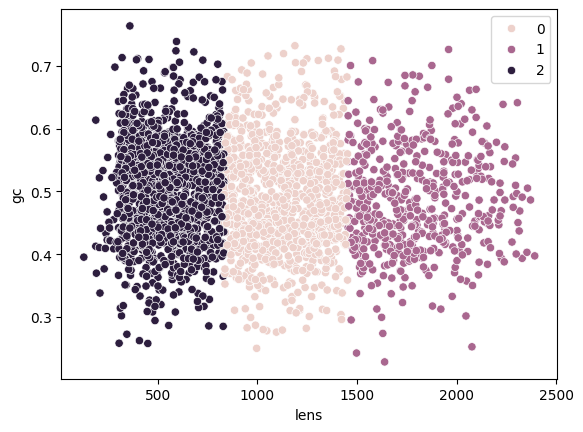

In [42]:
sns.scatterplot(x=df_reduced.iloc[:,0], y=df_reduced.iloc[:,1], hue=kmeans.labels_)

In [48]:
# Execute this cell to use the function

import pandas as pd

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler


def pca(data: pd.DataFrame) -> pd.DataFrame:
    """Takes a DataFrame and calculates the first two principle components

    Args:
        data (pd.DataFrame): The data used to gather the PCs

    Returns:
        pd.DataFrame: The resulting PCA data
    """

    scaler = MinMaxScaler()
    data = scaler.fit_transform(data.select_dtypes(include="number"))  #each feature is rescaled to the range of 0 to 1

    pcs = PCA(n_components=2).fit_transform(data) # returns a new DataFrame with columns PC1 and PC2

    return pd.DataFrame({"PC1": pcs[:, 0], "PC2": pcs[:, 1]})

Text(0.5, 1.0, 'Principle Component Analysis')

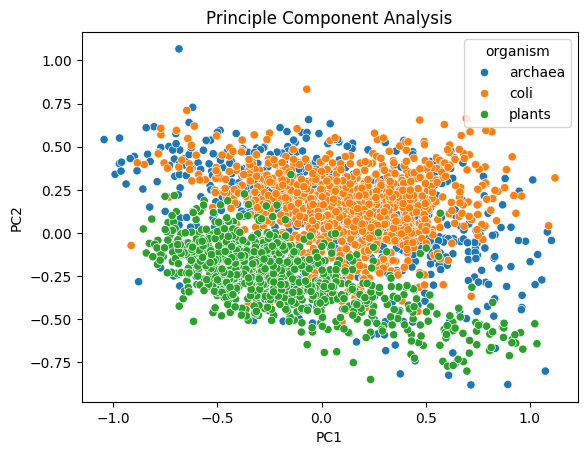

In [49]:
# Apply PCA
df_pca = pca(df)

# Add the labels again for the hue option
df_pca["organism"] = df.organism

plot = sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="organism")
plot.set_title("Principle Component Analysis")

## Data Clustering #2

KMeans is a powerful algorithm for detecting clusters, but it requires prior knowledge and assumes linear decision boundaries. Determining the appropriate number of 'classes' in your dataset can be challenging. Review SciKit-Learn's [documentation](https://scikit-learn.org/stable/modules/clustering.html) on clustering algorithms and try out at least one or two of them to repeat the previous task.

How do they perform? Which one do you prefer and why?

In [ ]:
# Enter Code gere

## Implementing KMeans

Your task is to implement the kmeans function using the provided helper functions. The kmeans function should take the input data points, the number of clusters, the maximum number of iterations, and the tolerance for convergence as arguments. It should return the final centroids and the labels assigned to each data point. The implementation is outlined as follows:

1. Initialize centroids

    * Use the `initialize_centroids` function to randomly select initial centroids from the data points.

2. Iterate until convergence or maximum iterations:

    * In each iteration
        * Assign labels to each data point based on the nearest centroid using the assign_labels function.
        * Compute new centroids as the mean of all points assigned to each cluster using the compute_centroids function.
        * Check for convergence using the has_converged function.
        * If converged, break the loop.

3. Return results:
    * Return the final centroids and the labels assigned to each data point.

### Helper functions

Execute the following cell to make use of the helper functions.

In [ ]:
import numpy as np


def initialize_centroids(X, n_clusters):
    """
    Randomly initialize centroids from the data points.

    Args:
        X (numpy.ndarray): The input data points.
        n_clusters (int): The number of clusters.

    Returns:
        numpy.ndarray: The initialized centroids.
    """
    np.random.seed(42)
    random_indices = np.random.permutation(X.shape[0])
    centroids = X[random_indices[:n_clusters]]
    return centroids


def assign_labels(X, centroids):
    """
    Assign labels to each data point based on the nearest centroid.

    Args:
        X (numpy.ndarray): The input data points.
        centroids (numpy.ndarray): The current centroids.

    Returns:
        numpy.ndarray: The labels assigned to each data point.
    """
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    labels = np.argmin(distances, axis=1)
    return labels


def compute_centroids(X, labels, n_clusters):
    """
    Compute new centroids as the mean of all points assigned to each cluster.

    Args:
        X (numpy.ndarray): The input data points.
        labels (numpy.ndarray): The labels assigned to each data point.
        n_clusters (int): The number of clusters.

    Returns:
        numpy.ndarray: The new centroids.
    """
    centroids = np.zeros((n_clusters, X.shape[1]))
    for k in range(n_clusters):
        cluster_points = X[labels == k]
        if len(cluster_points) > 0:
            centroids[k] = np.mean(cluster_points, axis=0)
    return centroids


def has_converged(old_centroids, new_centroids, tol):
    """
    Check if the centroids have converged.

    Args:
        old_centroids (numpy.ndarray): The old centroids.
        new_centroids (numpy.ndarray): The new centroids.
        tol (float): The tolerance for convergence.

    Returns:
        bool: True if the centroids have converged, False otherwise.
    """
    return np.all(np.abs(old_centroids - new_centroids) < tol)

In [ ]:
def kmeans(df, n_clusters=3, max_iter=300, tol=1e-4):
    """
    Apply the KMeans clustering algorithm.

    Args:
        X (numpy.ndarray): The input data points.
        n_clusters (int): The number of clusters.
        max_iter (int): The maximum number of iterations.
        tol (float): The tolerance for convergence.

    Returns:
        tuple: The final centroids and the labels assigned to each data point.
    """

    # Leave this to convert the DataFrame to NumPy
    X = df.select_dtypes(include="number")

    # Your code here